In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import math 
import scipy.special

plt.rc('font', family='serif', size=11)
plt.tight_layout()

from matplotlib import rcParams
rcParams["figure.dpi"] = 150

<Figure size 432x288 with 0 Axes>

In [15]:
#Expected units:
#t ... Time in days
#a1sini ... in seconds
#Porb ... in days
#star_planet_ratio ... how many times heavier is the star?

def tau(t, star_planet_ratio, a2sini , e, varpi, Porb, tp, nobessel):
    
    Omega = 2 * np.pi / Porb
    
    term1 = -a2sini / star_planet_ratio * 499 / 86400
    term2 = (1-e**2)
    
    sum_cosf = sum(scipy.special.jv(n,n*e)*np.cos(n*Omega*(t-tp)) for n in range(1,nobessel))
    sum_sinf = sum(scipy.special.jvp(n,n*e,n=1)*np.sin(n*Omega*(t-tp)) for n in range(1,nobessel))
    
    
    cosf  = - e + 2*(1-e**2)/e * sum_cosf
    sinf  = 2 * math.sqrt(1 - e**2) * sum_sinf
    
    term3 = (sinf * np.cos(varpi) + cosf * np.sin(varpi))/(1. + e*cosf)
    
    sol = term1*term2*term3
    
    return sol

def vrad(t, star_planet_ratio, a2sini , e, varpi, Porb, tp, nobessel):
    
    Omega = 2 * np.pi / Porb
    
    term1 = - Omega * a2sini / star_planet_ratio *1.736*10**6 #num.value is AU/day into m/s
    term2 = math.sqrt(1-e**2)
    
    sum_cosf = sum(scipy.special.jv(n,n*e)*np.cos(n*Omega*(t-tp)) for n in range(1,nobessel))
    sum_sinf = sum(scipy.special.jvp(n,n*e,n=1)*np.sin(n*Omega*(t-tp)) for n in range(1,nobessel))
    
    
    cosf  = - e + 2*(1-e**2)/e * sum_cosf
    sinf  = 2 * math.sqrt(1 - e**2) * sum_sinf
    
    term3 = (cosf * np.cos(varpi) - sinf * np.sin(varpi)) + e * np.cos(varpi)
    
    sol = term1*term2*term3
    
    return sol

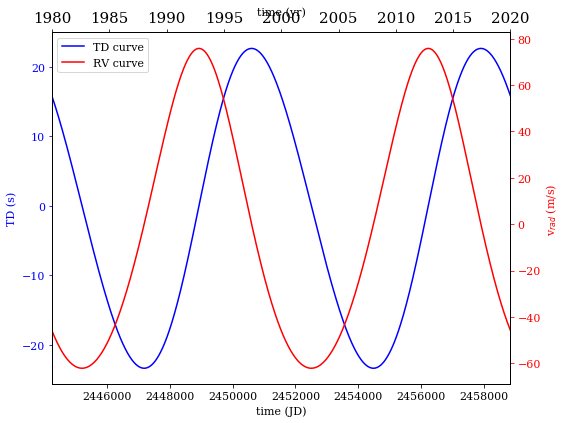

In [7]:
x = np.arange(2444240,2458850,1)

star_planet_ratio= 1.85 / 10 *1048
a2sini = 9 * np.sin(np.deg2rad(88.9))
e = 0.1
varpi = np.deg2rad(189)
Porb = 20*365.25
tp = 2456380

y_tau = tau(x, star_planet_ratio, a2sini, e, varpi, Porb, tp, 1000)
y_vrad = vrad(x, star_planet_ratio, a2sini, e, varpi, Porb, tp, 1000)


fig, ax1 = plt.subplots(1,1, figsize=(8, 6))

ax1.set_xlim(2444240,2458850)

lns1 = ax1.plot(x, y_tau*86400, 'b', label = "TD curve")
ax1.set_xlabel('time (JD)')

ax1.set_ylabel('TD (s)', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()

lns2 = ax2.plot(x, y_vrad, 'r', label = "RV curve")
ax2.set_ylabel('v$_{rad}$ (m/s)', color='r')
ax2.tick_params('y', colors='r')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


ax2 = ax1.twiny()
ax2.tick_params(axis='x', rotation=0)

t_1980 = 2444240.
t_1985 = 2446067.
t_1990 = 2447893.
t_1995 = 2449719
t_2000 = 2451545.
t_2005 = 2453372.
t_2010 = 2455198.
t_2015 = 2457024.
t_2020 = 2458850.


ax2.set_xticks([t_1980, t_1985, t_1990, t_1995, t_2000, t_2005, t_2010, t_2015, t_2020])

#ax1.set_xlim(1070,1090)
#ax1.set_ylim(-120,70)


xmin1, xmax1 = ax1.get_xlim()
ax2.set_xlim(xmin1,xmax1)
ax2.set_xticklabels(['1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'], fontsize=15)


ax2.set_xlabel('time (yr)')
ax2.xaxis.set_label_coords(0.5,1.05)


#ax1.set_xlabel('BJD - 2457000.0 [d]')
#ax1.set_ylabel('magnitudes [mmag]')

#ttl = ax1.title
#ttl.set_position([.5, 1.05])

#ax1.set_title('bRing+BLb')




fig.tight_layout()
plt.show()

#fig.savefig("betaPicb_TDRV.png")

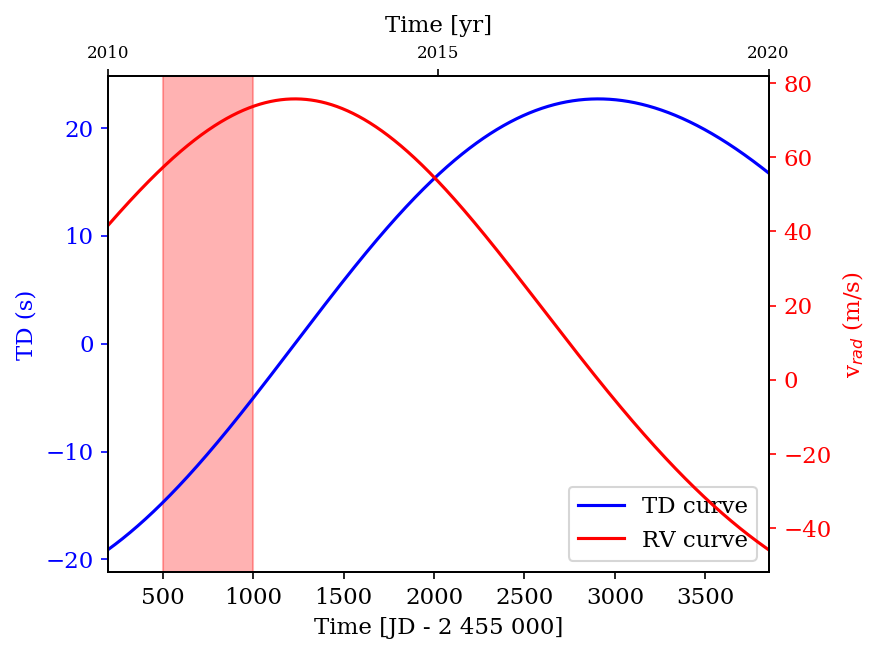

In [33]:
from matplotlib.patches import Patch

time_offset =  2455000

x = np.arange(2455198,2458850,1)

star_planet_ratio= 1.85 / 10 *1048
a2sini = 9 * np.sin(np.deg2rad(88.9))
e = 0.1
varpi = np.deg2rad(189)
Porb = 20*365.25
tp = 2456380

y_tau = tau(x, star_planet_ratio, a2sini, e, varpi, Porb, tp, 1000)
y_vrad = vrad(x, star_planet_ratio, a2sini, e, varpi, Porb, tp, 1000)


fig, ax1 = plt.subplots(1,1, figsize=(6, 4.5))

ax1.set_xlim(2455198 - time_offset, 2458850 - time_offset)

lns1 = ax1.plot(x - time_offset, y_tau*86400, 'b', label = "TD curve")
ax1.set_xlabel('Time [JD - 2 455 000]')

ax1.set_ylabel('TD (s)', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()

lns2 = ax2.plot(x - time_offset, y_vrad, 'r', label = "RV curve")
ax2.set_ylabel('v$_{rad}$ (m/s)', color='r')
ax2.tick_params('y', colors='r')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


ax2 = ax1.twiny()
ax2.tick_params(axis='x', rotation=0)

t_2010 = 2455198. - time_offset
t_2015 = 2457024. - time_offset
t_2020 = 2458850. - time_offset


ax2.set_xticks([t_2010, t_2015, t_2020])

#ax1.set_xlim(1070,1090)
#ax1.set_ylim(-120,70)


xmin1, xmax1 = ax1.get_xlim()
ax2.set_xlim(xmin1,xmax1)
ax2.set_xticklabels(['2010', '2015', '2020'], fontsize=8)


ax2.set_xlabel('Time [yr]', labelpad=30000)
ax2.xaxis.set_label_coords(0.5,1.09)


#ax1.set_xlabel('BJD - 2457000.0 [d]')
#ax1.set_ylabel('magnitudes [mmag]')

#ttl = ax1.title
#ttl.set_position([.5, 1.05])

#ax1.set_title('bRing+BLb')


ax1.axvspan(500, 1000, alpha=0.3, color='red')

fig.tight_layout()
plt.show()

#fig.savefig("TDRV.png")